<a href="https://colab.research.google.com/github/Jacobbaum19/Data-Science-Projects/blob/main/Jacob_Baum_Google_Trends_and_Data_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate?

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

<img src="https://th.bing.com/th/id/OIP.KmF5pKjdsyhAt5pZl_tKygAAAA?rs=1&pid=ImgDetMain"/>

(image credit to: paymentscardsandmobile.com)

# Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [ ]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li>
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [ ]:
df_tesla.shape

(124, 3)

In [ ]:
df_tesla.head(5)

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [ ]:
print(f'Largest value for Tesla in Web Search: {df_tesla["TSLA_WEB_SEARCH"].max()} ')
print(f'Smallest value for Tesla in Web Search: {df_tesla["TSLA_WEB_SEARCH"].min()}')

Largest value for Tesla in Web Search: 31 
Smallest value for Tesla in Web Search: 2


In [ ]:
# Some stats
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


Answer to last two questions:

- Time series is monthy
- A value of 100 mean is the peak for a Google Trend.

### Unemployment Data

In [ ]:
df_unemployment.head(5)

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [ ]:
df_unemployment.describe()

,UE_BENEFITS_WEB_SEARCH,UNRATE
count,181.000000,181.000000
mean,35.110497,6.217680
std,20.484925,1.891859
min,14.000000,3.700000
25%,21.000000,4.700000
50%,26.000000,5.400000
75%,45.000000,7.800000
max,100.000000,10.000000


In [ ]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment["UE_BENEFITS_WEB_SEARCH"].max()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


### Bitcoin

In [ ]:
df_btc_search.head(5)

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [ ]:
df_btc_search.describe()

,BTC_NEWS_SEARCH
count,73.000000
mean,15.013699
std,15.146959
min,3.000000
25%,5.000000
50%,14.000000
75%,18.000000
max,100.000000


In [ ]:
max_value = df_btc_search["BTC_NEWS_SEARCH"].max()
max_date = df_btc_search.loc[df_btc_search["BTC_NEWS_SEARCH"] == max_value].index[0]

# Shows up in the ending line.

# print(f'Largest BTC News Search: {max_value}')
# print(f'ID Number: {max_date}')

# Finding row 39
df_btc_search.iloc[39]

MONTH              2017-12
BTC_NEWS_SEARCH        100
Name: 39, dtype: object

# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [ ]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()} ')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()} ')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()} ')

Missing values for Tesla?: False 
Missing values for U/E?: False 
Missing values for BTC Search?: False 


In [ ]:
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()} ')

Missing values for BTC price?: True 


In [ ]:
print(f'Number of missing values: {df_btc_price.isna().values.sum()} ')

Number of missing values: 2 


In [ ]:
df_btc_price[df_btc_price["CLOSE"].isna()]

,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


**Challenge**: Remove any missing values that you found.

In [ ]:
# Usually this is bad practice to just remove NA values as there is usually a reason why.
# However one value filled in with the median or mean is not going to change much. Look at the shape below...
# 2204 observations of Bitcoin prices.

print(df_btc_price.shape)

df_btc_price.dropna(inplace=True)
df_btc_price.isna().values.any()

(2204, 3)


False

In [ ]:
# For viewing to convert to monthy later...

df_btc_price["DATE"].head(10)

0    2014-09-17
1    2014-09-18
2    2014-09-19
3    2014-09-20
4    2014-09-21
5    2014-09-22
6    2014-09-23
7    2014-09-24
8    2014-09-25
9    2014-09-26
Name: DATE, dtype: object

### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [ ]:
# Finding out the type of the MONTH column intially.
print(type(df_tesla["MONTH"][0]))

# Converting it into a Datetime object

df_tesla["MONTH"] = pd.to_datetime(df_tesla["MONTH"])

# Checking...
df_tesla["MONTH"].head(5)

<class 'str'>


0   2010-06-01
1   2010-07-01
2   2010-08-01
3   2010-09-01
4   2010-10-01
Name: MONTH, dtype: datetime64[ns]

In [ ]:
df_unemployment["MONTH"] = pd.to_datetime(df_unemployment["MONTH"])

In [ ]:
# Last two for bitcoin

df_btc_price["DATE"] = pd.to_datetime(df_btc_price["DATE"])
df_btc_search["MONTH"] = pd.to_datetime(df_btc_search["MONTH"])

### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [ ]:
monthly_btc_price_df = df_btc_price.resample("M", on="DATE").last()

In [ ]:
monthly_btc_price_df.head(5)



,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


In [ ]:
# Double checking... (I knew that row 13 is the last day of September is this df.)
# I looked up better ways but the wanted me to use resample and then use .last which defeats the purpose
# of checking it...
df_btc_price.iloc[13]

DATE      2014-09-30 00:00:00
CLOSE                 386.944
VOLUME             34707300.0
Name: 13, dtype: object

# Data Visualisation

### Notebook Formatting & Style Helpers

In [ ]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter("%Y")


### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'.

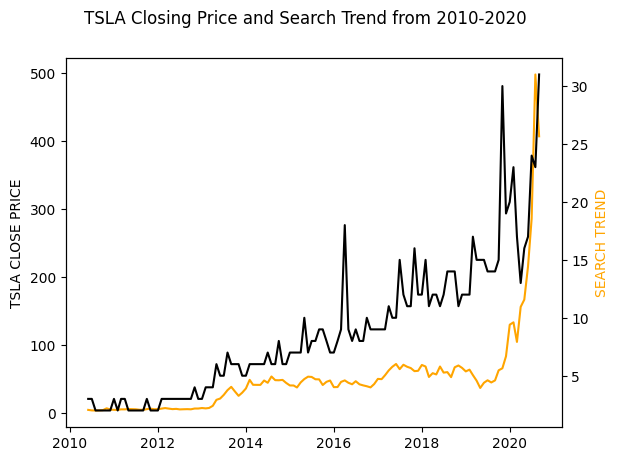

In [ ]:

# Sets up the double y-axis graph.
ax1 = plt.gca()
ax2 = ax1.twinx()

# Sets labels
ax1.set_ylabel("TSLA CLOSE PRICE")
ax2.set_ylabel("SEARCH TREND", color="orange")

# Sets title
plt.suptitle("TSLA Closing Price and Search Trend from 2010-2020")

# Actual plot
ax1.plot(df_tesla["MONTH"], df_tesla["TSLA_USD_CLOSE"], color="orange")
ax2.plot(df_tesla["MONTH"], df_tesla["TSLA_WEB_SEARCH"], color="black")



**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price.
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  

**Challenge**: Make the chart larger and easier to read.
1. Increase the figure size (e.g., to 14 by 8).
2. Increase the font sizes for the labels and the ticks on the x-axis to 14.
3. Rotate the text on the x-axis by 45 degrees.
4. Make the lines on the chart thicker.
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html).
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html).
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

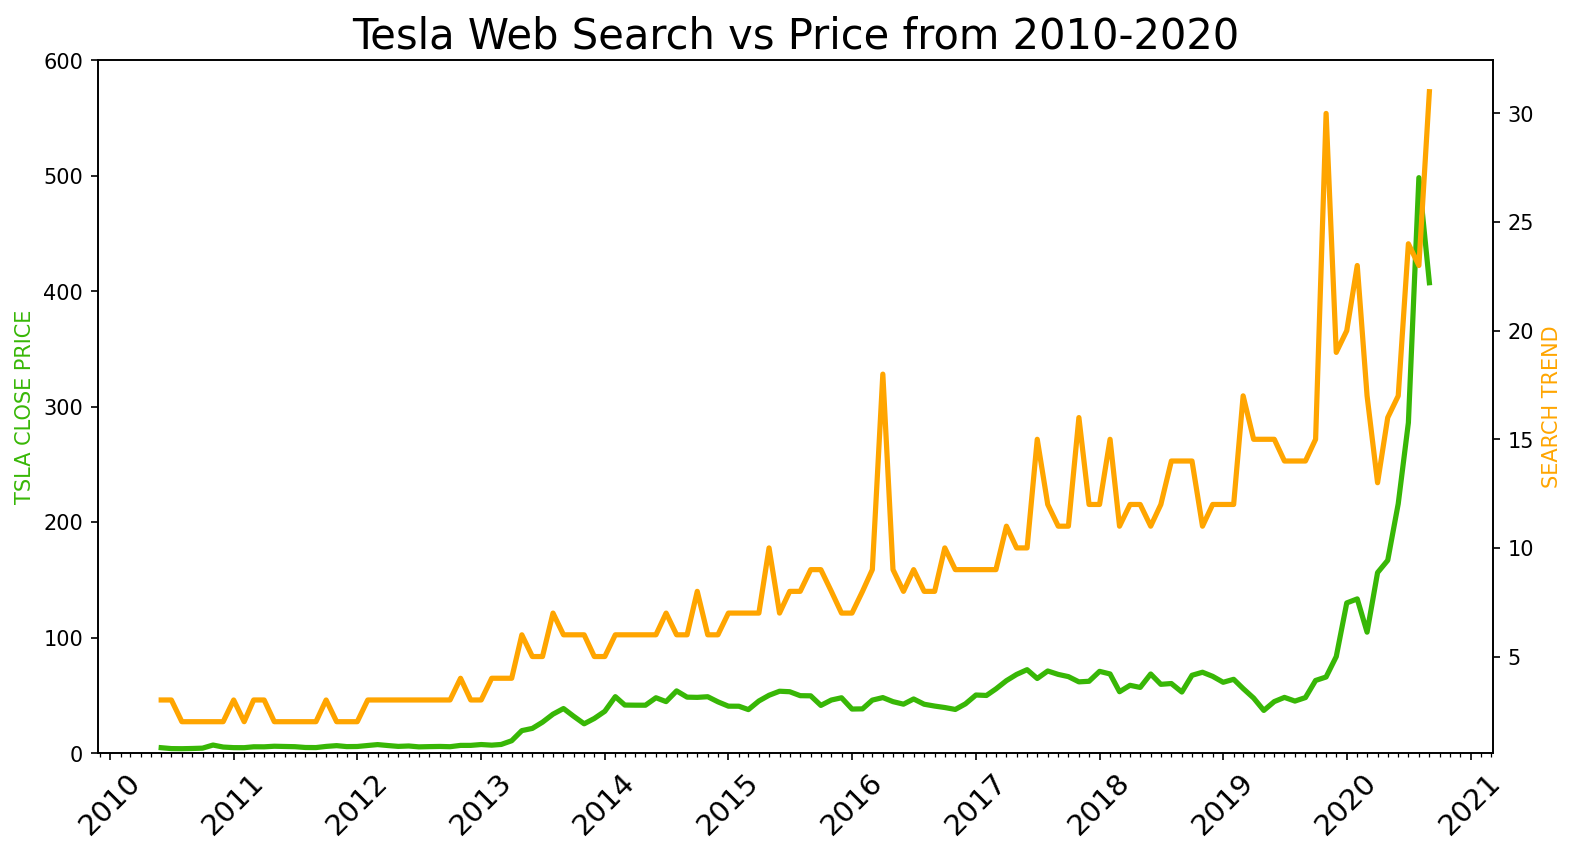

In [ ]:
# Added the various elements from the challenge above.
# [12, 16] is easier to view in my opinion.
plt.figure(figsize=(12, 6), dpi=150)
plt.title("Tesla Web Search vs Price from 2010-2020", fontsize=20)
plt.xticks(fontsize=14, rotation=45)

# Same as from above...
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel("TSLA CLOSE PRICE", color="#38B706")
ax2.set_ylabel("SEARCH TREND", color="orange")

# Setting the axes's limits.
ax1.set_ylim([0, 600])

ax1.plot(df_tesla["MONTH"], df_tesla["TSLA_USD_CLOSE"], color="#38B706", linewidth=2.5)
ax2.plot(df_tesla["MONTH"], df_tesla["TSLA_WEB_SEARCH"], color="orange", linewidth=2.5)

# Add tick marks before posting to GITHUB!

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

plt.show()

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

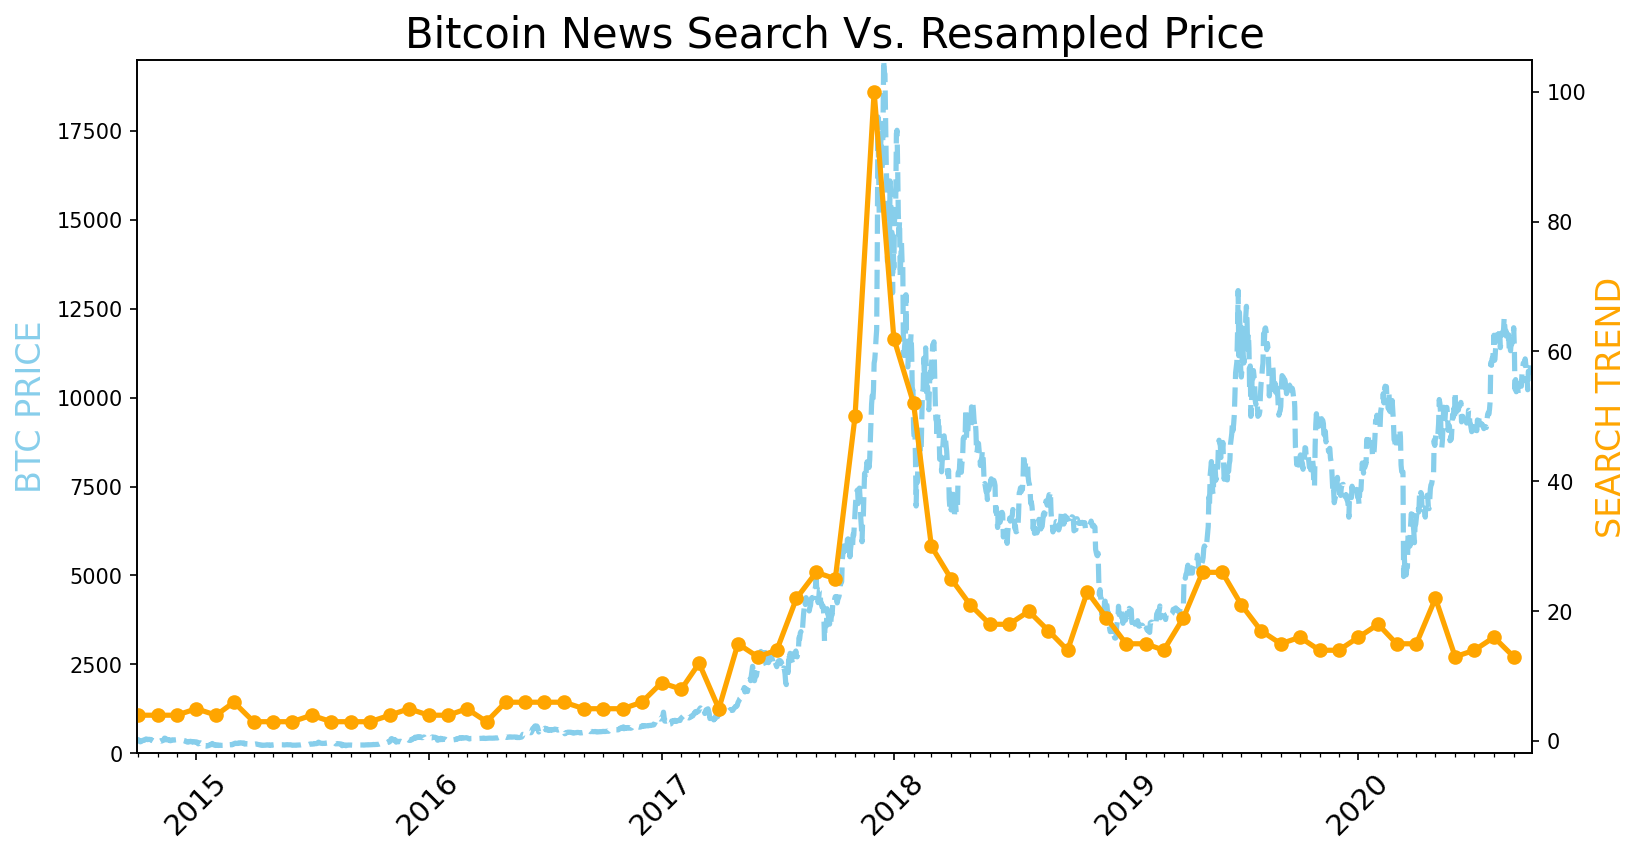

In [ ]:
# Similar process to the first chart.
# Setting up the figure, title and x axis ticks.

plt.figure(figsize=(12, 6), dpi=150)
plt.title("Bitcoin News Search Vs. Resampled Price", fontsize=20)
plt.xticks(fontsize=14, rotation=45)

# Setting up the axes
ax1 = plt.gca()
ax2 = ax1.twinx()

# Setting Y labels
ax1.set_ylabel("BTC PRICE", color="skyblue", fontsize=16)
ax2.set_ylabel("SEARCH TREND", color="orange", fontsize=16)

# Setting the axes's limits.
ax1.set_ylim([0, df_btc_price["CLOSE"].max()])
ax1.set_xlim([monthly_btc_price_df.index.min(), monthly_btc_price_df.index.max()])

# Plotting the data
ax1.plot(df_btc_price["DATE"], df_btc_price["CLOSE"], color="skyblue", linewidth=2.5, linestyle="--")
ax2.plot(df_btc_search["MONTH"], df_btc_search["BTC_NEWS_SEARCH"], color="orange", linewidth=2.5, marker="o")


# Formatting
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)




plt.show()

## Takeaways

- In 2018, Bitcoin experienced a meteoric rise in popularity, becoming the world's most widely recognized cryptocurrency overnight. This surge in interest was accompanied by a massive spike in both its price and the number of searches related to Bitcoin.

- However, the trend took an interesting turn in July 2019. While Bitcoin's price spiked again, the search volume for the cryptocurrency actually declined. This seeming contradiction could be attributed to a decrease in news coverage and public discourse surrounding Bitcoin by that time, as the initial novelty had worn off.

# Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate.
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br>
5. Can you discern any seasonality in the searches? Is there a pattern?

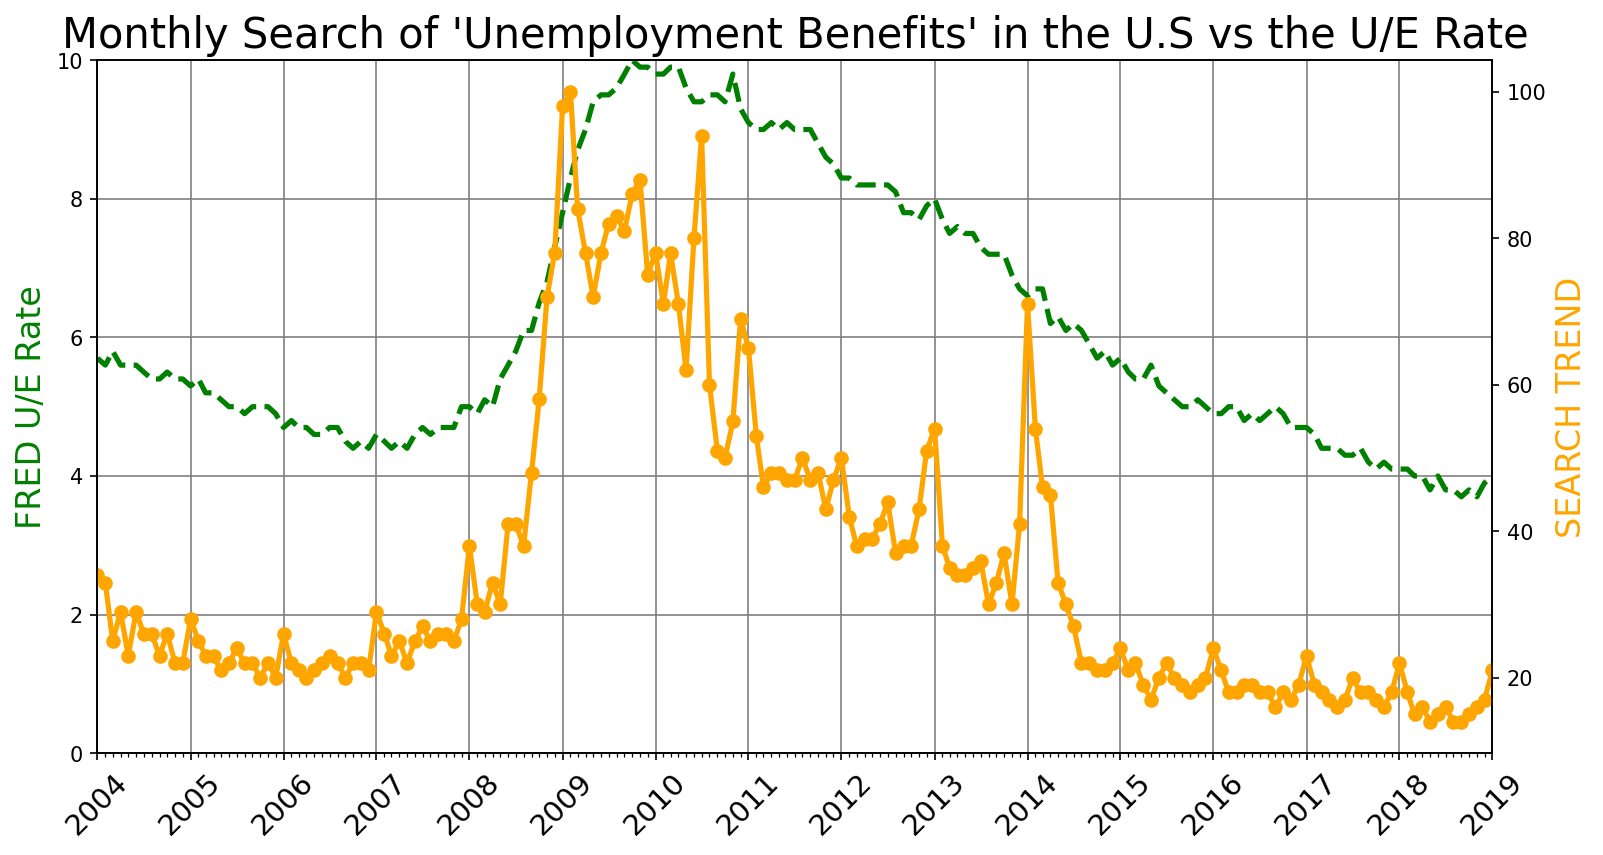

In [ ]:
# Setting up the figure, title and x axis ticks.

plt.figure(figsize=(12, 6), dpi=150)
plt.title("Monthly Search of 'Unemployment Benefits' in the U.S vs the U/E Rate", fontsize=20)
plt.xticks(fontsize=14, rotation=45)

# Setting up the axes
ax1 = plt.gca()
ax2 = ax1.twinx()

# Grid
ax1.grid(color="grey", linestyle="-")

# Setting Y labels
ax1.set_ylabel("FRED U/E Rate", color="green", fontsize=16)
ax2.set_ylabel("SEARCH TREND", color="orange", fontsize=16)

# Setting the axes's limits.
ax1.set_ylim([0, df_unemployment["UNRATE"].max()])
ax1.set_xlim([df_unemployment["MONTH"].min(), df_unemployment["MONTH"].max()])

# Plotting the data
ax1.plot(df_unemployment["MONTH"], df_unemployment["UNRATE"], color="green", linewidth=2.5, linestyle="--")
ax2.plot(df_unemployment["MONTH"], df_unemployment["UE_BENEFITS_WEB_SEARCH"], color="orange", linewidth=2.5, marker="o")


# Formatting
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)


plt.show()

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


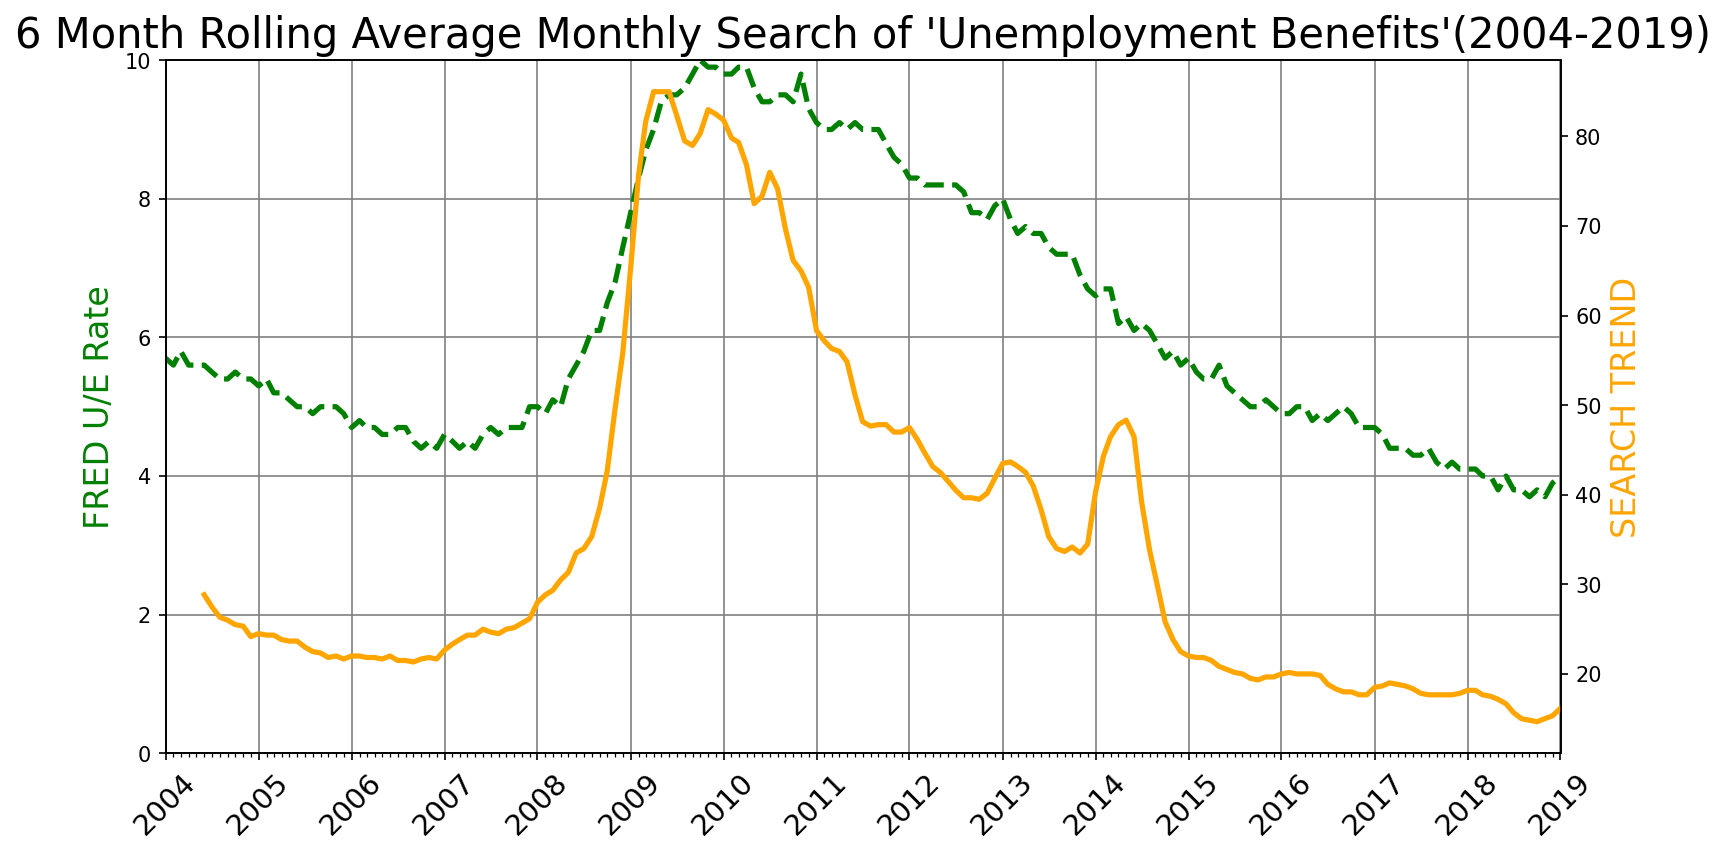

In [ ]:
# Calculate the 6-month rolling average with a new column
df_unemployment['UE_BENEFITS_WEB_SEARCH_ROLLING'] = df_unemployment['UE_BENEFITS_WEB_SEARCH'].rolling(window=6).mean()

# Setting up the figure, title and x axis ticks
plt.figure(figsize=(12, 6), dpi=150)
plt.title("6 Month Rolling Average Monthly Search of 'Unemployment Benefits'(2004-2019)", fontsize=20)
plt.xticks(fontsize=14, rotation=45)

# Setting up the axes
ax1 = plt.gca()
ax2 = ax1.twinx()

# Grid
ax1.grid(color="grey", linestyle="-")

# Setting Y labels
ax1.set_ylabel("FRED U/E Rate", color="green", fontsize=16)
ax2.set_ylabel("SEARCH TREND", color="orange", fontsize=16)

# Setting the axes's limits
ax1.set_ylim([0, df_unemployment["UNRATE"].max()])
ax1.set_xlim([df_unemployment["MONTH"].min(), df_unemployment["MONTH"].max()])

# Plotting the data
ax1.plot(df_unemployment["MONTH"], df_unemployment["UNRATE"], color="green", linewidth=2.5, linestyle="--")
ax2.plot(df_unemployment["MONTH"], df_unemployment["UE_BENEFITS_WEB_SEARCH_ROLLING"], color="orange", linewidth=2.5, linestyle="-") # Plotting the rolling average

# Formatting the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

plt.show()

### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [ ]:
df_unemployment_2020 = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')

In [ ]:
df_unemployment_2020["MONTH"] = pd.to_datetime(df_unemployment_2020["MONTH"])

# Checking to see if 2020 is in there...
df_unemployment_2020.tail(10)

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
190,2019-11-01,4,3.5
191,2019-12-01,5,3.5
192,2020-01-01,5,3.6
193,2020-02-01,5,3.5
194,2020-03-01,47,4.4
195,2020-04-01,100,14.7
196,2020-05-01,63,13.3
197,2020-06-01,53,11.1
198,2020-07-01,54,10.2
199,2020-08-01,50,8.4


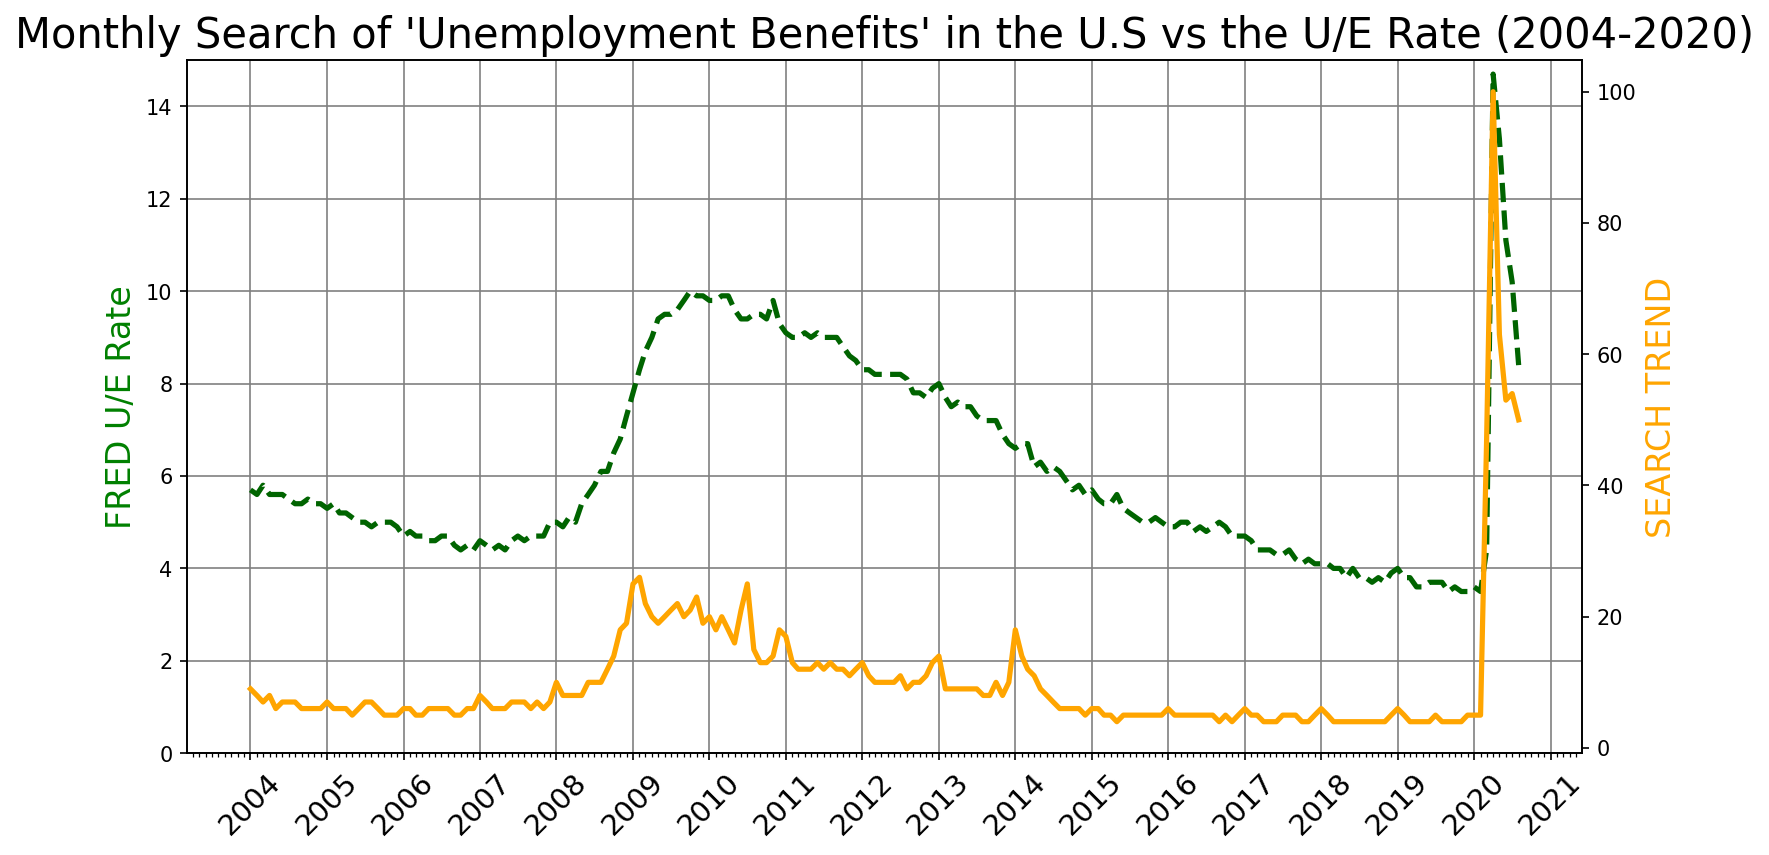

In [ ]:
# Setting up the figure, title and x axis ticks.
# I decided to get rid of the x axis limit because I liked the extra space after the max point of 2020.
# Makes visualizing the trend easier so it's not cluttered.

plt.figure(figsize=(12, 6), dpi=150)
plt.title("Monthly Search of 'Unemployment Benefits' in the U.S vs the U/E Rate (2004-2020)", fontsize=20)
plt.xticks(fontsize=14, rotation=45)

# Setting up the axes
ax1 = plt.gca()
ax2 = ax1.twinx()

# Grid
ax1.grid(color="grey", linestyle="-")

# Setting Y labels
ax1.set_ylabel("FRED U/E Rate", color="green", fontsize=16)
ax2.set_ylabel("SEARCH TREND", color="orange", fontsize=16)

# Setting the axes's limits.
ax1.set_ylim([0, 15])
# ax1.set_xlim([df_unemployment_2020["MONTH"].min(), df_unemployment_2020["MONTH"].max()])

# Plotting the data
ax1.plot(df_unemployment_2020["MONTH"], df_unemployment_2020["UNRATE"], color="darkgreen", linewidth=2.5, linestyle="--")
ax2.plot(df_unemployment_2020["MONTH"], df_unemployment_2020["UE_BENEFITS_WEB_SEARCH"], color="orange", linewidth=2.5)


# Formatting the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)


plt.show()

# Summary

- The analysis reveals a modest correlation between Google's search trend data and Telsa's stock price, Bitcoin's price and U.S's unemployment rate. This suggests that the search trend information could potentially provide insights into the observed patterns.

- Additionally, it is noteworthy that the Google search trend tends to lag behind the observation (Telsa stock price/Bitcoin price, etc.)
